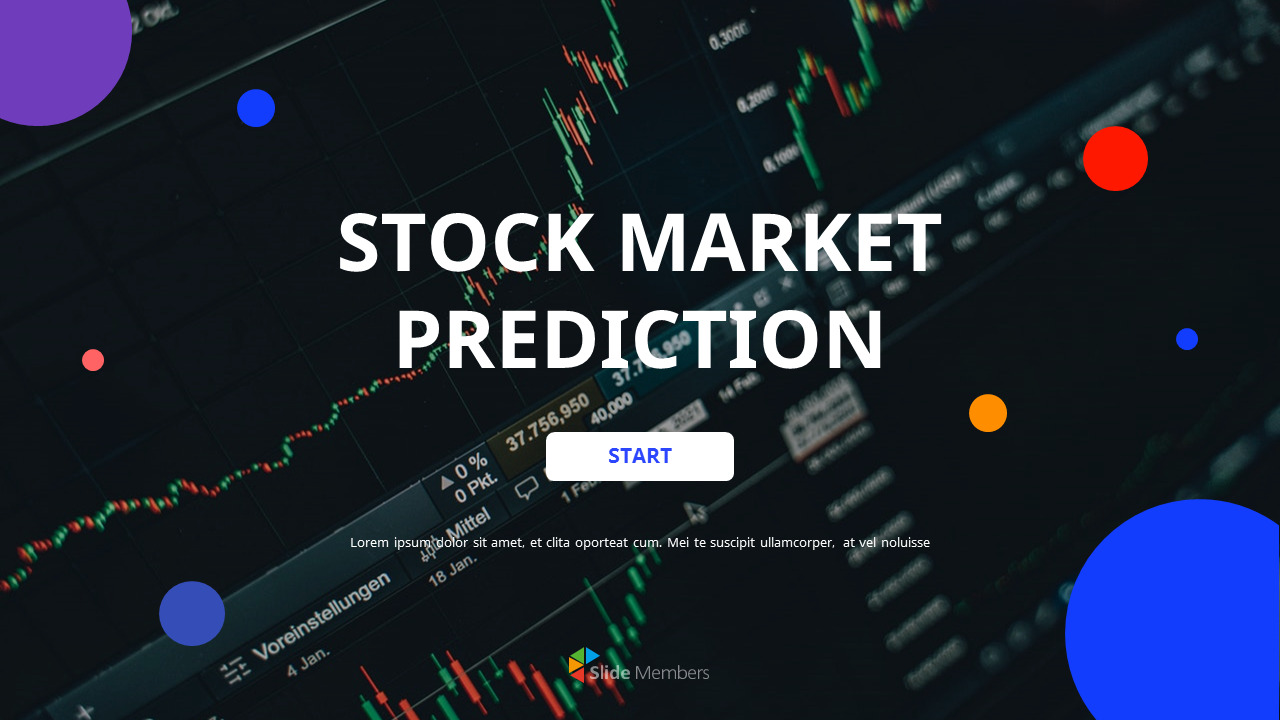

In [1]:
library(forecast)
library(smooth)
library(graphics)
library(datasets)
library(tseries)
library(ggplot2)
library(fpp2)
library(imputeTS)
library(xts)
library(greybox)
library(zoo)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: greybox

Package "greybox", v1.0.4 loaded.



Attaching package: ‘greybox’


The following object is masked from ‘package:forecast’:

    forecast


This is package "smooth", v3.1.5


── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──

✔ fma       2.4     ✔ expsmooth 2.3

── Conflicts ───────────────────────────────────────────────── fpp2_conflicts ──
✖ greybox::forecast() masks forecast::forecast()


Attaching package: ‘imputeTS’


The following object is masked from ‘package:tseries’:

    na.remove


Loading required package: zoo


Attaching package: ‘zoo’


The following object is masked from ‘package:imputeTS’:

    na.locf


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
setwd("/Users/harshitsinha/Desktop/PROJECT/BDO PEER MENTOR/Project")

In [3]:
Nifty50=read.csv("India_Nifty50.csv")
dim(Nifty50)

[1] 50  5

In [4]:
names(Nifty50)

[1] "Company.Name" "Industry"     "Symbol"       "Series"       "ISIN.Code"

In [5]:
Nifty50_India <- read.csv("India_Nifty50.csv",nrows=10)
Nifty50_India

Company.Name                               Industry           Symbol    
1  Adani Ports and Special Economic Zone Ltd. SERVICES           ADANIPORTS
2  Asian Paints Ltd.                          CONSUMER GOODS     ASIANPAINT
3  Axis Bank Ltd.                             FINANCIAL SERVICES AXISBANK  
4  Bajaj Auto Ltd.                            AUTOMOBILE         BAJAJ-AUTO
5  Bajaj Finance Ltd.                         FINANCIAL SERVICES BAJFINANCE
6  Bajaj Finserv Ltd.                         FINANCIAL SERVICES BAJAJFINSV
7  Bharat Petroleum Corporation Ltd.          OIL & GAS          BPCL      
8  Bharti Airtel Ltd.                         TELECOM            BHARTIARTL
9  Britannia Industries Ltd.                  CONSUMER GOODS     BRITANNIA 
10 Cipla Ltd.                                 PHARMA             CIPLA     
   Series ISIN.Code   
1  EQ     INE742F01042
2  EQ     INE021A01026
3  EQ     INE238A01034
4  EQ     INE917I01010
5  EQ     INE296A01024
6  EQ     INE918I01018
7  EQ     INE029A01011
8  EQ     INE397D01024
9  EQ     INE216A01030
10 EQ     INE059A01026

A Time Series:
 [1] "INE742F01042" "INE021A01026" "INE238A01034" "INE917I01010" "INE296A01024"
 [6] "INE918I01018" "INE029A01011" "INE397D01024" "INE216A01030" "INE059A01026"

Warning message in data.frame(y = as.numeric(object), x = as.numeric(time(object))):
“NAs introduced by coercion”


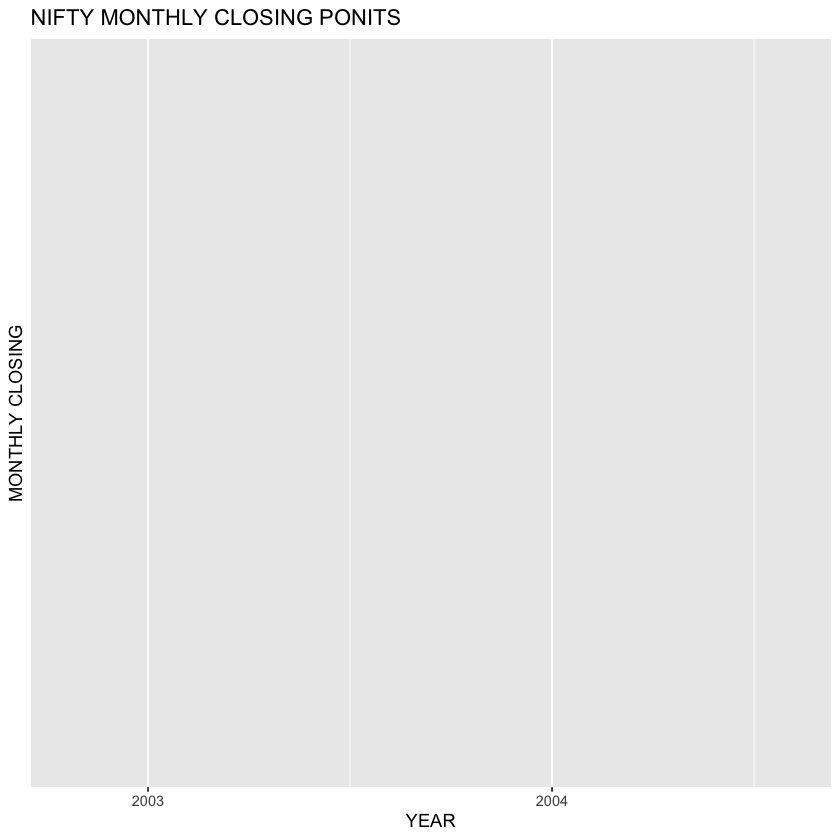

In [6]:
Nifty50_India.ts = ts(Nifty50_India[,5], start = c(2001,10), frequency = 5)

Nifty50_India.ts 

autoplot(Nifty50_India.ts) + ggtitle("NIFTY MONTHLY CLOSING PONITS") + xlab("YEAR") + ylab("MONTHLY CLOSING")

Obtaining stock prediction

In [7]:
library(quantmod)
price_bbri <- getSymbols("BBRI.JK", auto.assign=FALSE, from="2012-01-01", to="2022-04-18")
head(price_bbri)

Loading required package: TTR


Attaching package: ‘TTR’


The following object is masked from ‘package:smooth’:

    lags


‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“BBRI.JK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


           BBRI.JK.Open BBRI.JK.High BBRI.JK.Low BBRI.JK.Close BBRI.JK.Volume
2012-01-02         1360         1370        1350          1360       15835000
2012-01-03         1380         1390        1360          1380       81980000
2012-01-04         1390         1390        1370          1390      151180000
2012-01-05         1390         1400        1370          1390      134337500
2012-01-06         1380         1400        1370          1380      105145000
2012-01-09         1400         1400        1370          1400      116387500
           BBRI.JK.Adjusted
2012-01-02         1013.698
2012-01-03         1028.606
2012-01-04         1036.059
2012-01-05         1036.059
2012-01-06         1028.606
2012-01-09         1043.513

# Stock Price Visualization

## 1. Static Plot

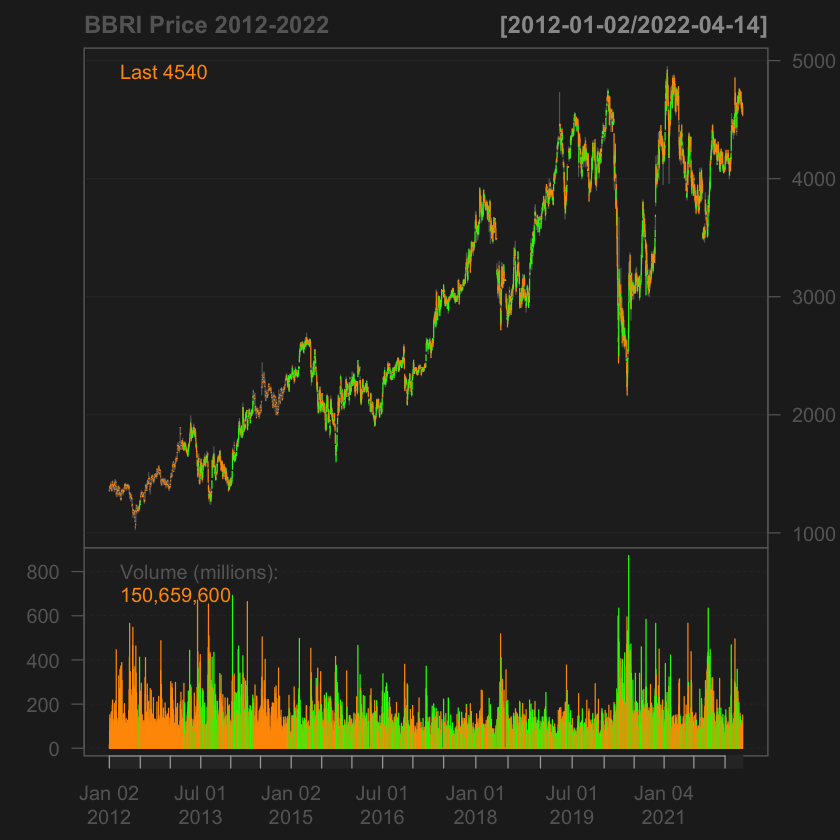

In [8]:
# Candle stick chart
chartSeries(price_bbri, name = "BBRI Price 2012-2022")


In [9]:
# Take only the closing price
closing_pr <- Cl(to.monthly(price_bbri))

Warning message in to.period(x, "months", indexAt = indexAt, name = name, ...):
“missing values removed from data”


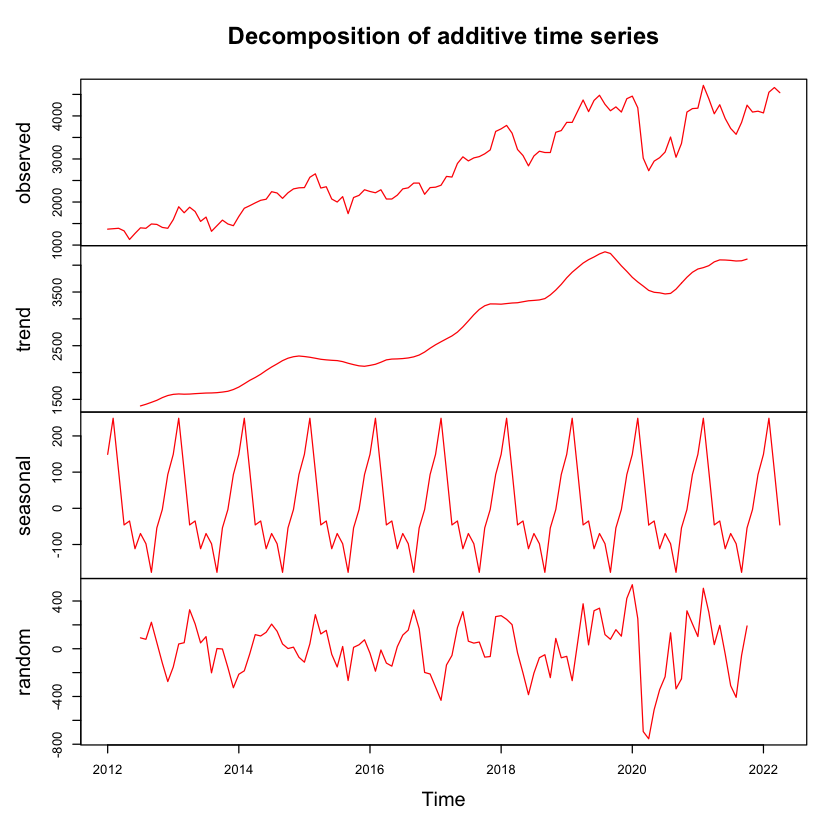

In [10]:
# Decompose it
dc <- decompose(as.ts(closing_pr, start=c(2012,1)))
plot(dc , col = "red")

In [11]:
# Seasonal component 
dc$seasonal

Jan         Feb         Mar         Apr         May         Jun        
2012  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2013  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2014  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2015  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2016  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2017  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2018  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2019  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2020  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2021  149.136808  248.892986  102.862127  -45.887873  -35.008243 -111.674910
2022  149.136808  248.892986  102.862127  -45.887873                        
     Jul         Aug         Sep         Oct         Nov         Dec        
2012  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2013  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2014  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2015  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2016  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2017  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2018  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2019  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2020  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2021  -69.667812  -97.859593 -176.959479  -53.959479   -3.178007   93.303475
2022

## 2. Interactive Plot

In [12]:
library(highcharter)

Highcharts (www.highcharts.com) is a Highsoft software product which is

not free for commercial and Governmental use



In [13]:
highchart(type="stock") %>% 
  hc_add_series(price_bbri) %>% 
  hc_add_series(SMA(na.omit(Cl(price_bbri)),n=50),name="SMA(50)") %>% 
  hc_add_series(SMA(na.omit(Cl(price_bbri)),n=200),name="SMA(200)") %>% 
  hc_title(text="<b>BBRI Price Candle Stick Chart 2012-2022</b>")

HTML widgets cannot be represented in plain text (need html)

In [14]:
# Fetch BBNI, BMRI, and IHSG stock prices
price_bbni <- getSymbols("BBNI.JK",auto.assign=FALSE,from="2012-01-01",to="2022-12-31")
price_bmri <- getSymbols("BMRI.JK",auto.assign=FALSE,from="2012-01-01",to="2022-12-31")
price_ihsg <- getSymbols("^JKSE",auto.assign=FALSE,from="2012-01-01",to="2022-12-31")

# Compare the stock prices
highchart(type="stock") %>% 
  hc_add_series(Cl(price_bbri), name="BBRI") %>% 
  hc_add_series(Cl(price_bbni), name="BBNI") %>% 
  hc_add_series(Cl(price_bmri), name="BMRI") %>% 
  hc_add_series(Cl(price_ihsg), name="IHSG") %>% 
  hc_title(text="<b>BBRI vs BBNI vs BMRI vs IHSG Closing Price</b>")

Warning message:
“BBNI.JK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“BMRI.JK contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“^JKSE contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


HTML widgets cannot be represented in plain text (need html)

## Stocks Return Analysis

In [15]:
# Calculate the stocks return
return_bbri <- dailyReturn(Cl(price_bbri))
return_bbni <- dailyReturn(Cl(price_bbni))
return_bmri <- dailyReturn(Cl(price_bmri))

# Combine the returns as one data frame
returns <- data.frame(return_bbri,return_bbni,return_bmri)
names(returns) <- c("return_bbri","return_bbni","return_bmri")
returns <- as.xts(returns)

# Plot the returns
library(PerformanceAnalytics)
charts.PerformanceSummary(returns,main="Daily Return BBRI vs BBNI vs BMRI 2014-2019")

Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”
Warning message in to_period(xx, period = on.opts[[period]], ...):
“missing values removed from data”


ERROR: Error in data.frame(return_bbri, return_bbni, return_bmri): arguments imply differing number of rows: 2557, 2560


In [ ]:
install.packages("timeSeries")

In [ ]:
install.packages("quantmod")

In [ ]:
install.packages("tseries")

In [ ]:
install.packages("forecast")

In [ ]:
install.packages("xts")

In [ ]:
#install.packages("__")
library(quantmod)
library(tseries)
library(timeSeries)
library(forecast)
library(xts)

In [ ]:
packages =  c("ggplot2", "dplyr", "tidyr", "data.table", 'corrplot', 'gridExtra', 'forecast', 'tseries', 'TSA', 'tibble', 'TTR', 'xts', 'dygraphs', 'assertthat')

my.install <- function(pkg, ...){
  if (!(pkg %in% installed.packages()[,1])) {
    install.packages(pkg)
  }
  return (library(pkg, ...))
}

purrr::walk(packages, my.install, character.only = TRUE, warn.conflicts = FALSE)

In [ ]:
sample_num = 5

In [ ]:
s_data <- read.csv(file ="/Users/harshitsinha/Desktop/PROJECT/BDO PEER MENTOR/Project/all_stocks_2006-01-01_to_2018-01-01.csv")

In [ ]:
library(quantmod)
s_data <- getSymbols("BBRI.JK",auto.assign=FALSE, from="2006-01-01", to="2018-01-01")
head(s_data)

In [ ]:
str(s_data)

In [ ]:
s_data[is.na(s_data)] <- 0
s_data$Date <- as.Date(s_data$Date, format = "%Y-%m-%d")
summary(s_data)

In [ ]:
options(repr.plot.width=12, repr.plot.height=12) 

p1 = ggplot(s_data, aes(Open)) + geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()# + xlim(c(0, 1000))

p2 = ggplot(s_data, aes(High)) + geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()# + xlim(c(0, 1000))

p3 = ggplot(s_data, aes(Low)) + geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()# + xlim(c(0, 1000))

p4 = ggplot(s_data, aes(Close)) + geom_histogram(bins = 50, aes(y = ..density..), col = "red", fill = "red", alpha = 0.3) + geom_density()# + xlim(c(0, 1000))

grid.arrange(p1,p2,p3,p4, nrow=2,ncol=2)

example as Amazon 

In [ ]:
#Getting AMAZON stock dataset and loading the needed packages
if(!require(quantmod)) install.packages("quantmod")
if(!require(forecast)) install.packages("forecast")
if(!require(xlsx)) install.packages("xlsx")
if(!require(tseries)) install.packages("tseries")
if(!require(timeSeries)) install.packages("timeSeries")
if(!require(dplyr)) install.packages("dplyr")
if(!require(fGarch)) install.packages("fGarch")
if(!require(prophet)) install.packages("prophet")
library(prophet)
library(quantmod)
library(forecast)
library("xlsx")
library(tseries)
library(timeSeries)
library(dplyr)
library(fGarch)

getSymbols("AMZN", src="yahoo", from="2015-01-01")

In [ ]:
# Conduct ADF test for dataset
print(adf.test(close_price))

In [ ]:
Box.test(modelfit$residuals, lag= 2, type="Ljung-Box")


# Forecasting Time-Series Data

## 1. Splitting The Data

In [ ]:
# Number of period we want to forecast
n <- 100

# Splitting the data
train <- head(Cl(price_bbri), length(Cl(price_bbri))-n)
test <- tail(Cl(price_bbri), n)

## 2. Naive Method

In [ ]:
library(forecast)

# Forecast the data
fc_na <- naive(train, h=n)

# Plot the result
autoplot(fc_na) +
  autolayer(ts(test, start=length(train)), series = "Test Data")

## 3. ARIMA Model

In [ ]:
# Create the Model
model_non <- auto.arima(train, seasonal=FALSE)

# Forecast n periods of the data
fc_non <- forecast(model_non, h=n)

# Plot the result
autoplot(fc_non)+
  autolayer(ts(test, start= length(train)), series="Test Data")

In [ ]:
# Create the Model
model_s <- auto.arima(train)

# Forecast n periods of the data
fc_s <- forecast(model_s, h=n)

# Plot the result
autoplot(fc_s)+
  autolayer(ts(test, start= length(train)), series="Test Data")

## 4. Forecast Evaluation

In [ ]:
checkresiduals(fc_na ,col ="blue")

### Residual of ARIMA Model

In [ ]:
checkresiduals(fc_non,col="green")

### Accuracy Metrics of Naive Method

In [ ]:
accuracy(fc_na)

### Accuracy Metrics of ARIMA

In [ ]:
accuracy(fc_non)

# CONCLUSION

Time-series data is everywhere and most of them can affect our decision. Beside the stock price that we have discussed through out this article, certainly there are a lot of other examples. For a businessman that owns a department store, sales data must be an important time-series data that drives his business decision. We can also analyze and forecast sales data to help a businessman in making his decision.

Decomposing time-series data can give us a more detail view of the pattern of our data. Analyzing it will help us in making decision about our data. However, decomposition in R can only be done to ts object that the frequency has been specified.

After analyzing our time-series data, we usually want to forecast it to help us create decision regarding the future. However, keep in mind that the result of forecasting can never be 100% accurate, so we must have second plan for the future decision. Forecasting can be done using many models and algorithms. In this article, we have discussed about Naive Method and ARIMA model.

Naive method is a great tool to become a baseline of our other models and a really simple method because we only use the last observation as the forecast result. Although in some case the forecast result of this method can be useful (for example: a salesman that target his next month sales to become the same as this month), however it is suggested that we use other more robust approach to deal with other cases. On the other hand, ARIMA model (including the seasonal one) can be a good model to forecast data that are more fluctuated. However, this model can only be used for data that can be differenced to achieve stationarity. There are many other models that maybe can give a better result for your dataset, so don’t be hesitate to explore more!